In [1]:
import importlib
import sys
import os
import glob
import time
#import h5py
import traceback

import pandas as pd
import numpy as np
import matplotlib as mpl
mpl.use('nbagg')
import seaborn as sns
import pylab as pl

# import some custom funcs
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import utils as util
import behavior as butil
import auxiliary as aux
import plotting as putil

In [2]:
util.set_sns_style(style='dark', min_fontsize=8)
%matplotlib notebook
rootdir = util.get_rootdir()
rootdir

'/home/julianarhee/edgetracking-googledrive/Edge_Tracking/Data'

In [106]:
#rootdir = '/Volumes/Julie/2p-data'
rootdir = '/mnt/minerva/2p-data'
# -------------------------------------------------
date = 20230822 #20230725 #20230822 #20230822
flynum = 5
# -------------------------------------------------
# get directories
session = str(date)
sessdir = os.path.join(rootdir, session)
print(sessdir)
# behavior data
behavior_dir = os.path.join(sessdir, 'behavior')
logdir = os.path.join(sessdir, 'behavior') #'logfiles')
videodir = os.path.join(sessdir, 'behavior') #'videos')
# 2p data
neural_dir = os.path.join(sessdir, 'raw')

# fly ID -------------------------------------------
flyid = 'fly{}'.format(flynum)
logfiles = aux.get_logs_for_fly_date(date, flynum, logdir)
logfiles
#
figid = '{}-{}'.format(session, flyid)
print(figid)

# DESTDIR -------------------------------------------
destdir = os.path.join(rootdir, session, 'processed')
if not os.path.exists(destdir):
    os.makedirs(destdir)
    
#
figdir = os.path.join(destdir, 'figures')
if not os.path.exists(figdir):
    os.makedirs(figdir)

/mnt/minerva/2p-data/20230822
20230822-fly5


In [324]:
importlib.reload(aux)
importlib.reload(butil)
importlib.reload(util)

<module 'utils' from '/home/julianarhee/Repositories/plume-tracking/utils.py'>

In [325]:
# debug
#fn = logfiles[0]
# fn = '/mnt/minerva/2p-data/20230822/behavior/20230822-180322_P1_activation_fly5_000.log'
# print(fn)
# exp_config = butil.load_experiment_config(fn)
# fps = exp_config['experiment']['acquisition_rate']
# df_ = butil.load_dataframe(fn, is_odor=False, remove_invalid=False) 
# df_  = aux.ft_skips_to_blocks(df_, acquisition_rate=fps)
# df_ = aux.process_df_blocks(df_)
# # df_ = aux.load_dataframe(fn)
# df_['blocknum'].unique()

In [326]:
# exp_config = butil.load_experiment_config(fn)
# fps = exp_config['experiment']['acquisition_rate']
# df_ = butil.load_dataframe(fn, is_odor=False, remove_invalid=False)
# Find restarts:
# df_[(df_['ft_posx']==0) & (df_['ft_posy']==0)]
# bad_skips = butil.check_ft_skips(df_, acquisition_rate=fps, return_skips=True)
# index of bad_skips is df_.loc[x], where x is the 0,0 restart.

In [327]:
xvar = 'ft_posx'
yvar = 'ft_posy'
default_cond = 'tap'
df0 = aux.logfiles_to_dataframe(logfiles, flyid)
#merged = aux.merge_blocks(df0)

/mnt/minerva/2p-data/20230822/behavior/20230822-180203_P1_activation_fly5_000.log
/mnt/minerva/2p-data/20230822/behavior/20230822-180322_P1_activation_fly5_000.log
/mnt/minerva/2p-data/20230822/behavior/20230822-182855_P1_activation_fly5_002.log
/mnt/minerva/2p-data/20230822/behavior/20230822-185038_P1_activation_fly5_003.log


In [323]:
fn = '/mnt/minerva/2p-data/20230822/behavior/20230822-185038_P1_activation_fly5_003.log'
exp_config = butil.load_experiment_config(fn)
fps = exp_config['experiment']['acquisition_rate']
#df_, cfg_= aux.load_dataframe(fn) # is_odor=False, remove_invalid=False)
df_, cfg_= aux.load_dataframe(fn) # is_odor=False, remove_invalid=False)
#df_  = aux.ft_skips_to_blocks(df_, acquisition_rate=fps)


In [242]:
bad_skips = butil.check_ft_skips(df_, acquisition_rate=fps, return_skips=True)
bad_skips

df_, cfg_= aux.load_dataframe(fn) 

In [243]:
bad_skips = butil.check_ft_skips(df_, acquisition_rate=fps, return_skips=True)
bad_skips

{'ft_posx': array([11760, 20689, 22161, 26894]),
 'ft_posy': array([11760, 20689, 22161, 26894, 28941])}

In [244]:
df_.iloc[280:290][['ft_posx', 'ft_posy', 'rel_time']].diff()

,ft_posx,ft_posy,rel_time
280,NaN,NaN,NaN
281,0.517017,-1.214624,0.016238
282,1.749362,-1.216603,0.017439
283,1.704455,-1.497298,0.015830
284,1.427404,-1.702996,0.017563
285,1.024597,-1.677414,0.016950
286,0.758363,-2.746803,0.016135
287,0.256131,-2.231968,0.016325
288,-0.047392,-2.480249,0.016307
289,-0.636978,-2.413357,0.016634


In [266]:
fn = '/mnt/minerva/2p-data/20230822/behavior/20230822-185038_P1_activation_fly5_003.log'

df0[df0['fpath']==fn].loc[28941-2:28941+2][['ft_posx', 'ft_posy', 'blocknum']]

,ft_posx,ft_posy,blocknum
28939,3.562437,-23.660681,4
28940,3.693079,-23.597289,4
28941,-0.000000,-0.000000,5
28942,0.013745,-0.005094,5
28943,0.021387,-0.008044,5


In [267]:
df0[df0['fpath']==fn].iloc[280:290][['ft_posx', 'ft_posy', 'rel_time']].diff()

,ft_posx,ft_posy,rel_time
280,NaN,NaN,NaN
281,0.517017,-1.214624,0.016238
282,1.749362,-1.216603,0.017439
283,1.704455,-1.497298,0.015830
284,1.427404,-1.702996,0.017563
285,1.024597,-1.677414,0.016950
286,0.758363,-2.746803,0.016135
287,0.256131,-2.231968,0.016325
288,-0.047392,-2.480249,0.016307
289,-0.636978,-2.413357,0.016634


In [328]:
del merged
merged = aux.merge_blocks(df0)

In [329]:
fn = '/mnt/minerva/2p-data/20230822/behavior/20230822-185038_P1_activation_fly5_003.log'

merged[merged['fpath']==fn].loc[28941-2:28941+2][['ft_posx', 'ft_posy', 'blocknum']]

,ft_posx,ft_posy,blocknum
28939,-39.536951,-272.666208,4
28940,-39.406308,-272.602815,4
28941,-39.406308,-272.602815,5
28942,-39.392563,-272.607909,5
28943,-39.384921,-272.610859,5


In [331]:
merged[merged['fpath']==fn].iloc[280:290][['ft_posx', 'ft_posy', 'rel_time', 'speed']].diff()

,ft_posx,ft_posy,rel_time,speed
280,NaN,NaN,NaN,NaN
281,0.517017,-1.214624,0.016238,10.857589
282,1.749362,-1.216603,0.017439,33.334810
283,1.704455,-1.497298,0.015830,2.062189
284,1.427404,-1.702996,0.017563,-13.092825
285,1.024597,-1.677414,0.016950,23.174205
286,0.758363,-2.746803,0.016135,12.359789
287,0.256131,-2.231968,0.016325,-11.987772
288,-0.047392,-2.480249,0.016307,5.456035
289,-0.636978,-2.413357,0.016634,7.904372


In [312]:
df0[df0['fpath']==fn].iloc[280:290][['ft_posx', 'ft_posy', 'rel_time']].diff()

,ft_posx,ft_posy,rel_time
280,NaN,NaN,NaN
281,0.517017,-1.214624,0.016238
282,1.749362,-1.216603,0.017439
283,1.704455,-1.497298,0.015830
284,1.427404,-1.702996,0.017563
285,1.024597,-1.677414,0.016950
286,0.758363,-2.746803,0.016135
287,0.256131,-2.231968,0.016325
288,-0.047392,-2.480249,0.016307
289,-0.636978,-2.413357,0.016634


In [273]:
fn = '/mnt/minerva/2p-data/20230822/behavior/20230822-185038_P1_activation_fly5_003.log'

df = df0[df0['fpath']==fn].copy()

In [278]:
df0['filename'].unique()

array(['20230822-180203_P1_activation_fly5_000',
       '20230822-180322_P1_activation_fly5_000',
       '20230822-182855_P1_activation_fly5_002',
       '20230822-185038_P1_activation_fly5_003'], dtype=object)

In [302]:
del df
df_list=[]
for fn, df in df0.groupby('filename'):
    print(fn, df.shape, df['blocknum'].unique())
    if df['blocknum'].nunique()>1:
        last_x, last_y, last_t = df[df['blocknum']==0][['ft_posx', 'ft_posy', 'rel_time']].iloc[-1]
        for bnum, block_ in df[df['blocknum']>0].groupby('blocknum'):
            print(fn, bnum)
            #print(bnum, last_x, last_y, last_t)
            curr_xvs = df[df['blocknum']==bnum]['ft_posx'].values
            curr_yvs = df[df['blocknum']==bnum]['ft_posy'].values
            #curr_ts = df[df['blocknum']==bnum]['rel_time'].values
            # add offsets
            df.loc[df['blocknum']==bnum, 'ft_posx'] = curr_xvs + last_x
            df.loc[df['blocknum']==bnum, 'ft_posy'] = curr_yvs + last_y
            #df.loc[df['blocknum']==bnum, 'rel_time'] = curr_ts + last_t
            # update last
            last_x, last_y, last_t = df[df['blocknum']==bnum][['ft_posx', 'ft_posy', 'rel_time']].iloc[-1]
        # reprocess with updated position info
        df_p = aux.process_df(df) # fps=fps, filter_duration=False)
        df_list.append(df_p)
    else:
        df_list.append(df)
merged = pd.concat(df_list, axis=0)


20230822-180203_P1_activation_fly5_000 (408, 45) [0]
20230822-180322_P1_activation_fly5_000 (38958, 45) [0]
20230822-182855_P1_activation_fly5_002 (40276, 45) [0]
20230822-185038_P1_activation_fly5_003 (33739, 45) [0 1 2 3 4 5]
20230822-185038_P1_activation_fly5_003 1
20230822-185038_P1_activation_fly5_003 2
20230822-185038_P1_activation_fly5_003 3
20230822-185038_P1_activation_fly5_003 4
20230822-185038_P1_activation_fly5_003 5


In [303]:
fn = '/mnt/minerva/2p-data/20230822/behavior/20230822-185038_P1_activation_fly5_003.log'

merged[merged['fpath']==fn].iloc[280:290][['ft_posx', 'ft_posy', 'rel_time']].diff()

,ft_posx,ft_posy,rel_time
280,NaN,NaN,NaN
281,0.517017,-1.214624,0.016238
282,1.749362,-1.216603,0.017439
283,1.704455,-1.497298,0.015830
284,1.427404,-1.702996,0.017563
285,1.024597,-1.677414,0.016950
286,0.758363,-2.746803,0.016135
287,0.256131,-2.231968,0.016325
288,-0.047392,-2.480249,0.016307
289,-0.636978,-2.413357,0.016634


In [294]:
df['blocknum'].unique()

array([0, 1, 2, 3, 4, 5])

<IPython.core.display.Javascript object>


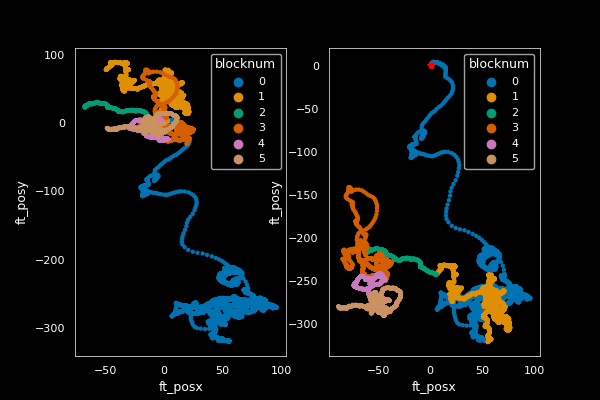

In [332]:
fig, axn = pl.subplots(1, 2)
ax=axn[0]
sns.scatterplot(data=df0[df0['fpath']==fn], x='ft_posx', y='ft_posy', hue='blocknum', edgecolor='none', palette='colorblind', s=10, ax=ax)
ax=axn[1]
sns.scatterplot(data=merged[merged['fpath']==fn], x='ft_posx', y='ft_posy', hue='blocknum', edgecolor='none', palette='colorblind', s=10, ax=ax)
ax.plot(merged[merged['fpath']==fn].iloc[0]['ft_posx'], merged[merged['fpath']==fn].iloc[0]['ft_posx'], 'r*')

<IPython.core.display.Javascript object>


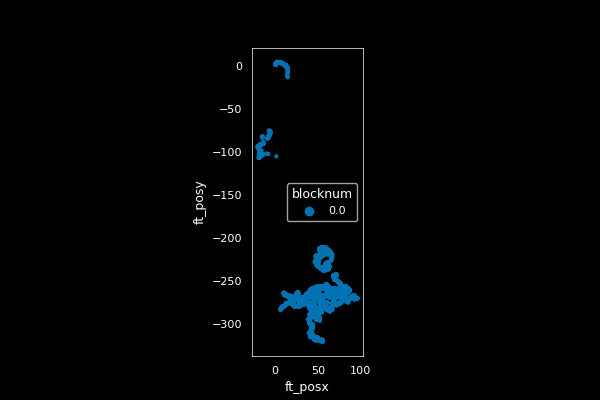

In [209]:
fig, ax =pl.subplots()
sns.scatterplot(data=merged[(merged['fpath']==fn) & (merged['blocknum']==0)], x='ft_posx', y='ft_posy', hue='blocknum', edgecolor='none', palette='colorblind', s=10, ax=ax)
ax.set_aspect('equal')

In [217]:
testdf = merged[(merged['fpath']==fn) & (merged['blocknum']==0)].copy()
np.where(testdf[['ft_posx', 'ft_posy', 'rel_time']].diff().abs()['ft_posy']>10)


(array([  282,   536,  2034,  3798,  9393, 10415]),)

In [220]:
testdf.iloc[280:290][['ft_posx', 'ft_posy', 'rel_time']].diff()

,ft_posx,ft_posy,rel_time
280,NaN,NaN,NaN
281,0.517017,-1.214624,0.016238
313,-23.432144,-70.879184,0.533902
314,-0.042714,-0.097628,0.066190
315,0.016718,-0.006577,0.017116
316,-0.006797,-0.004978,0.015923
317,-0.003474,-0.004962,0.017105
318,0.137836,0.191332,0.033521
319,0.116159,0.155629,0.016204
320,0.192847,0.146708,0.018071


In [227]:
bad_skips = butil.check_ft_skips(testdf, acquisition_rate=fps, return_skips=True)
bad_skips

{'ft_posx': array([  282,   320,   535,   536,  2034,  7700,  9393, 10415]),
 'ft_posy': array([  282,   320,   536,   887,  2034,  3798,  9393,  9767, 10415])}

In [230]:
butil.check_ft_skips(df_, acquisition_rate=fps, return_skips=True)

{'ft_posx': array([11760, 20689, 22161, 26894]),
 'ft_posy': array([11760, 20689, 22161, 26894, 28941])}

In [232]:
df_.iloc[280:290][['ft_posx', 'ft_posy', 'rel_time']].diff()

,ft_posx,ft_posy,rel_time
280,NaN,NaN,NaN
281,0.517017,-1.214624,0.016238
282,1.749362,-1.216603,0.017439
283,1.704455,-1.497298,0.015830
284,1.427404,-1.702996,0.017563
285,1.024597,-1.677414,0.016950
286,0.758363,-2.746803,0.016135
287,0.256131,-2.231968,0.016325
288,-0.047392,-2.480249,0.016307
289,-0.636978,-2.413357,0.016634


In [221]:
poslim = 400
max_step_pos = np.ceil(poslim * (1/fps) )
print(max_step_pos)

7.0


In [223]:
stepsize =max_step_pos
np.where(testdf['ft_posy'].diff().abs()>=stepsize)[0]

array([  282,   320,   536,   887,  2034,  3798,  9393,  9767, 10415])

In [163]:
zero_pos = []
if 'ft_posx' in bad_skips.keys():
    zero_pos.extend(bad_skips['ft_posx'])
if 'ft_posy' in bad_skips.keys():
    zero_pos.extend(bad_skips['ft_posy'])
zero_pos = np.unique(zero_pos)
zero_pos


array([11760, 20689, 22161, 26894, 28941])

In [165]:
found_zeros = df_[(df_['ft_posx']==0) & (df_['ft_posy']==0)]
bad_skip_start_ixs=[]
if found_zeros.shape[0] != len(zero_pos):
    print("*Warning: N zero points ({}) don't match skips ({}) -- using N zero points.".format(found_zeros.shape[0], len(zero_pos)))
    zero_pos = found_zeros.index.tolist()


In [167]:
grouped_by_consec = util.group_consecutives(zero_pos)
bad_skip_start_ixs = [i[0] for i in grouped_by_consec]
bad_skip_start_ixs

[11760, 20689, 22161, 26894, 28941]

In [333]:
filenames = sorted(df0['filename'].dropna().unique(), key=util.natsort)
filenames

['20230822-180203_P1_activation_fly5_000',
 '20230822-180322_P1_activation_fly5_000',
 '20230822-182855_P1_activation_fly5_002',
 '20230822-185038_P1_activation_fly5_003']

In [334]:
# save
merged_data_fpath = os.path.join(destdir, '{}.pkl'.format(figid))
print(merged_data_fpath)
merged.to_pickle(merged_data_fpath)  # where to save it, usually as a .pkl
merged.to_csv(merged_data_fpath.replace('pkl', 'csv'))

/mnt/minerva/2p-data/20230822/processed/20230822-fly5.pkl


<IPython.core.display.Javascript object>


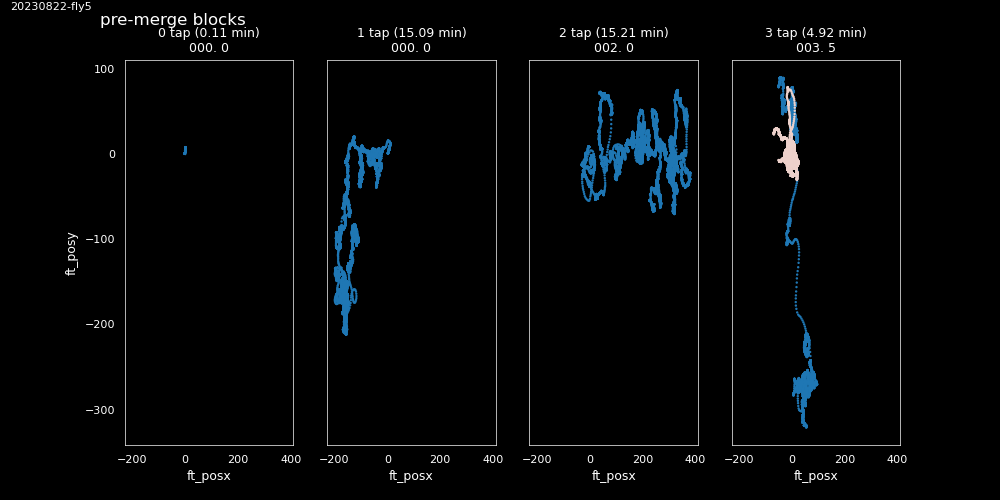

20230822-185038_P1_activation_fly5_003
tracking_premerge-bouts_20230822-fly5


In [335]:
#curr_trials = df0[['filename', 'blocknum']].drop_duplicates().dropna().shape[0]
n_trials = len(filenames)
max_nblocks = int(df0['blocknum'].max()+1)
fig, axn = pl.subplots(1, n_trials, figsize=(10, 5), sharex=True, sharey=True)
    
for fi, (fn, df_) in enumerate(df0.sort_values(by='filename').groupby('filename')):
    colors = sns.color_palette('cubehelix', n_colors=df_['blocknum'].nunique())
    for ci, (bk, df2) in enumerate(df_.groupby('blocknum')):
        ax=axn[fi]
        dur_min = df_['rel_time'].max() / 60.
        sns.scatterplot(data=df2, x=xvar, y=yvar, ax=ax,
                       edgecolor='none', s=3 , legend=0, hue='blocknum', color=colors[ci])
        curr_cond = df_['condition'].unique()[0]
    ax.set_title('{} {} ({:.2f} min)\n{}. {}'.format(fi, curr_cond, dur_min, \
                                                  fn.split('_')[-1], bk))
    #ax.set_aspect('equal')
#util.label_figure(fig, '{}'.format(os.path.split(fn)[-1]))
figname = '{}'.format(fn)
print(fn)
fig.text(0.1, 0.95, 'pre-merge blocks', fontsize=12)


util.label_figure(fig, figid)
figname = 'tracking_premerge-bouts_{}'.format(figid)
pl.savefig(os.path.join(figdir, '{}.png'.format(figname)))
print(figname)

## double-check correct position updating

<IPython.core.display.Javascript object>


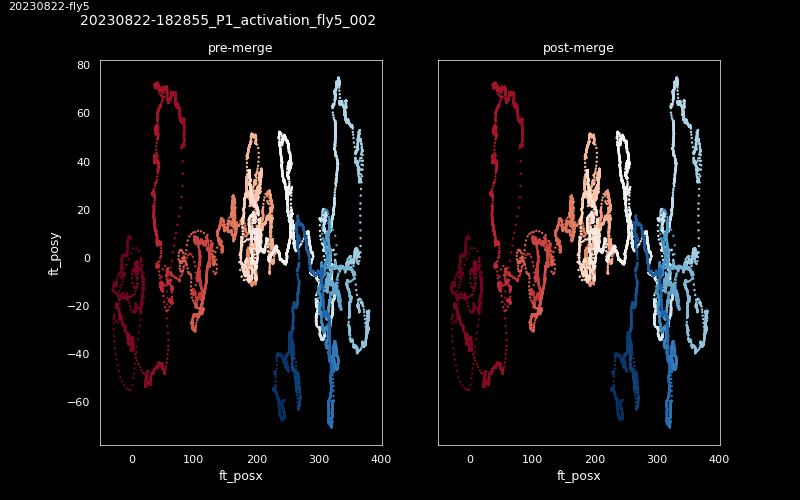

tracking_check-merge_traj-by-time


<IPython.core.display.Javascript object>


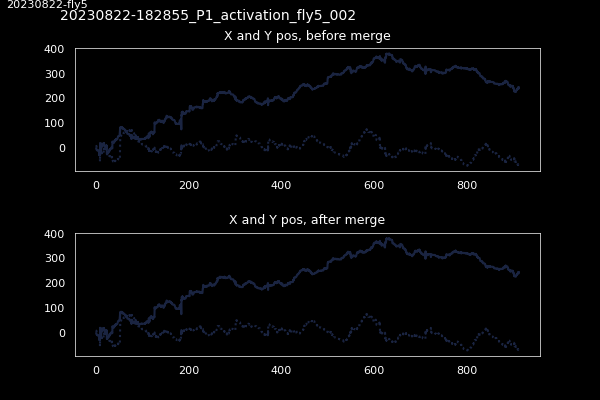

tracking_check-merge_xy-blocks_20230822-fly5


In [337]:
# ------------------------------------------ 
# check trajector pre/post
# ------------------------------------------
fn = df0['filename'].unique()[2]
df0_ = df0[df0['filename']==fn].copy()
df1_ = merged[merged['filename']==fn].copy()
fig, axn = pl.subplots(1,2, figsize=(8,5), sharex=True, sharey=True)
fig.text(0.1, 0.95, fn)
ax=axn[0]; ax.set_title('pre-merge')
sns.scatterplot(data=df0_, x=xvar, y=yvar, ax=ax, 
                hue='rel_time',palette='RdBu',
                edgecolor='none', s=3 , legend=0) 
ax=axn[1]; ax.set_title('post-merge')
sns.scatterplot(data=df1_, x=xvar, y=yvar, ax=ax, hue='rel_time',palette='RdBu',
                       edgecolor='none', s=3 , legend=0)

util.label_figure(fig, figid)
figname = 'tracking_check-merge_traj-by-time'
pl.savefig(os.path.join(figdir, '{}.png'.format(figname)))
print(figname)

# ------------------------------------------ 
# split x, y by block
# ------------------------------------------
fig, axn = pl.subplots(2, 1)
fig.text(0.1, 0.95, fn)
ax=axn[0]
for c, (bnum, b_) in zip(colors, df0_.groupby('blocknum')):
    ax.plot(b_['rel_time'], b_['ft_posx'], color=c)
    ax.plot(b_['rel_time'], b_['ft_posy'], color=c, linestyle=':')
ax.set_title('X and Y pos, before merge')
ax=axn[1]
for c, (bnum, b_) in zip(colors, df1_.groupby('blocknum')):
    ax.plot(b_['rel_time'], b_['ft_posx'], color=c)
    ax.plot(b_['rel_time'], b_['ft_posy'], color=c, linestyle=':')
ax.set_title('X and Y pos, after merge')
pl.subplots_adjust(hspace=0.5)

util.label_figure(fig, figid)
figname = 'tracking_check-merge_xy-blocks_{}'.format(figid)
pl.savefig(os.path.join(figdir, '{}.png'.format(figname)))
print(figname)

In [338]:
merged['filename'].unique()

array(['20230822-180203_P1_activation_fly5_000',
       '20230822-180322_P1_activation_fly5_000',
       '20230822-182855_P1_activation_fly5_002',
       '20230822-185038_P1_activation_fly5_003'], dtype=object)

<IPython.core.display.Javascript object>


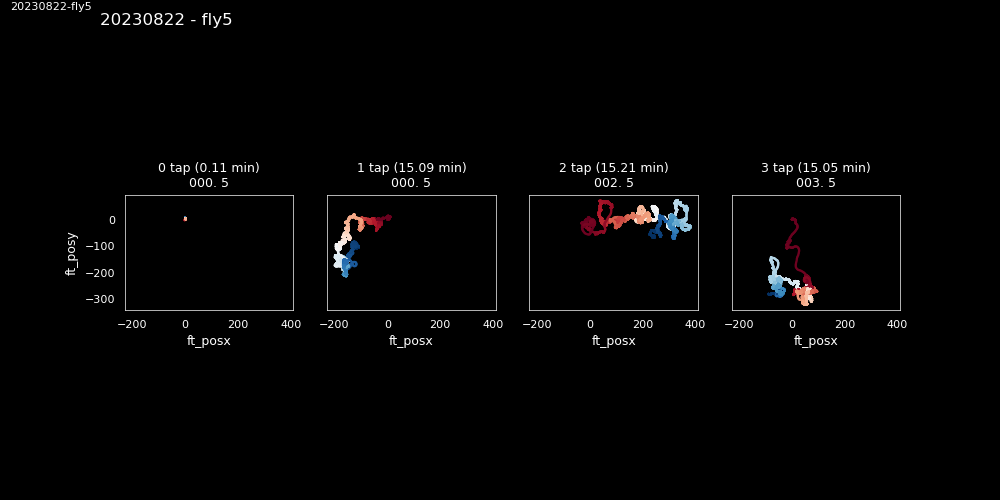

20230822-185038_P1_activation_fly5_003
tracking_merged-bouts_by-time_20230822-fly5


In [339]:
#curr_trials = df0[['filename', 'blocknum']].drop_duplicates().dropna().shape[0]
n_trials = merged['filename'].dropna().nunique()
max_nblocks = int(df0['blocknum'].max()+1)
fig, axn = pl.subplots(1, n_trials, figsize=(10, 5), sharex=True, sharey=True)
    
for fi, (fn, df_) in enumerate(merged.sort_values(by='filename').groupby('filename')):
    colors = sns.color_palette('cubehelix', n_colors=df_['blocknum'].nunique())
    ax=axn[fi]
    dur_min = df_['rel_time'].max() / 60.
    sns.scatterplot(data=df_, x=xvar, y=yvar, ax=ax, palette='RdBu',
                   edgecolor='none', s=3 , legend=0, hue='rel_time') #color=colors[ci])
                    #hue_norm=mpl.colors.Normalize(vmin=0, vmax=1800))
    curr_cond = df_['condition'].unique()[0]
    ax.set_title('{} {} ({:.2f} min)\n{}. {}'.format(fi, curr_cond, dur_min, \
                                                  fn.split('_')[-1], bk))
    ax.set_aspect('equal')
    #ax.set_aspect('equal')
#util.label_figure(fig, '{}'.format(os.path.split(fn)[-1]))
figname = '{}'.format(fn)
print(fn)
    
fig.text(0.1, 0.95, '{} - {}'.format(date, flyid), fontsize=12)

util.label_figure(fig, figid)
figname = 'tracking_merged-bouts_by-time_{}'.format(figid)
pl.savefig(os.path.join(figdir, '{}.png'.format(figname)))
print(figname)

In [340]:
merged['filename'].unique()

array(['20230822-180203_P1_activation_fly5_000',
       '20230822-180322_P1_activation_fly5_000',
       '20230822-182855_P1_activation_fly5_002',
       '20230822-185038_P1_activation_fly5_003'], dtype=object)

In [341]:
df0['filename'].dropna().unique()

array(['20230822-180203_P1_activation_fly5_000',
       '20230822-180322_P1_activation_fly5_000',
       '20230822-182855_P1_activation_fly5_002',
       '20230822-185038_P1_activation_fly5_003'], dtype=object)

## Look at 1 trial

In [342]:
filenames

['20230822-180203_P1_activation_fly5_000',
 '20230822-180322_P1_activation_fly5_000',
 '20230822-182855_P1_activation_fly5_002',
 '20230822-185038_P1_activation_fly5_003']

20230822-185038_P1_activation_fly5_003


<IPython.core.display.Javascript object>


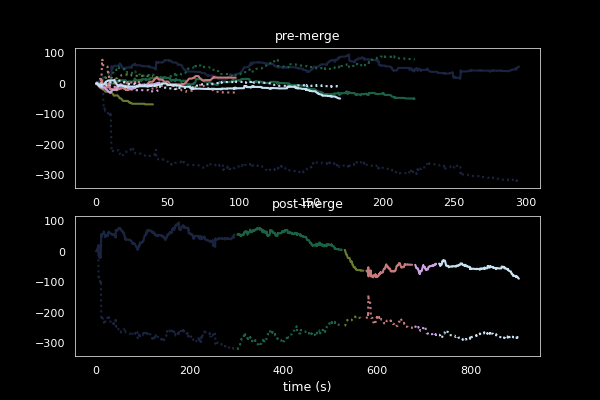

Text(0.5, 0, 'time (s)')

In [343]:
fn = filenames[-1]
print(fn)
df0_ = df0[df0['filename']==fn].copy()
df1_ = merged[merged['filename']==fn].copy()
fig, axn = pl.subplots(2, 1)
ax=axn[0]; ax.set_title('pre-merge');
for c, (bnum, b_) in zip(colors, df0_.groupby('blocknum')):
    ax.plot(b_['rel_time'], b_['ft_posx'], color=c)
    ax.plot(b_['rel_time'], b_['ft_posy'], color=c, linestyle=':')
    
ax=axn[1]; ax.set_title('post-merge')
for c, (bnum, b_) in zip(colors, df1_.groupby('blocknum')):
    ax.plot(b_['rel_time'], b_['ft_posx'], color=c)
    ax.plot(b_['rel_time'], b_['ft_posy'], color=c, linestyle=':')
    
ax.set_xlabel('time (s)')

## Compare 2 conditions

<IPython.core.display.Javascript object>


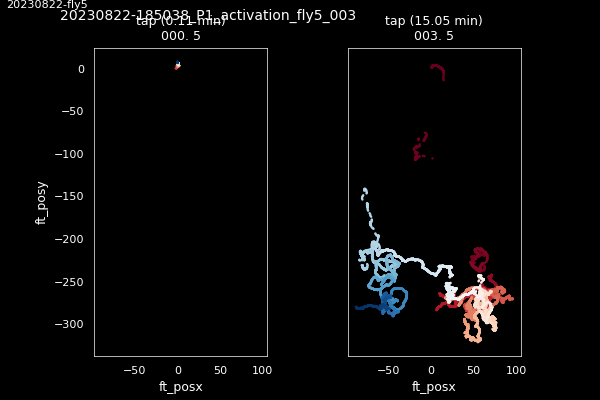

tracking_by-time_tap_v_notap_20230822-180203_P1_activation_fly5_000


In [156]:
fig, axn = pl.subplots(1, 2, sharex=True, sharey=True)
f1 = filenames[0];
f2 = filenames[-1]

for ai, fn in enumerate([f1, f2]):
    ax=axn[ai]
    df1_ = merged[merged['filename']==fn].copy()
    dur_min = df1_['rel_time'].max() / 60.
    sns.scatterplot(data=df1_, x=xvar, y=yvar, ax=ax, palette='RdBu',
                   edgecolor='none', s=3 , legend=0, hue='rel_time') #color=colors[ci])
                    #hue_norm=mpl.colors.Normalize(vmin=0, vmax=1800))
    curr_cond = df1_['condition'].unique()[0]
    ax.set_title('{} ({:.2f} min)\n{}. {}'.format(curr_cond, dur_min, \
                                                  fn.split('_')[-1], bk))
    ax.set_aspect('equal')
fig.text(0.1, 0.95, fn)

util.label_figure(fig, figid)
figname = 'tracking_by-time_tap_v_notap_{}'.format(f1)
pl.savefig(os.path.join(figdir, '{}.png'.format(figname)))
print(figname)

<IPython.core.display.Javascript object>


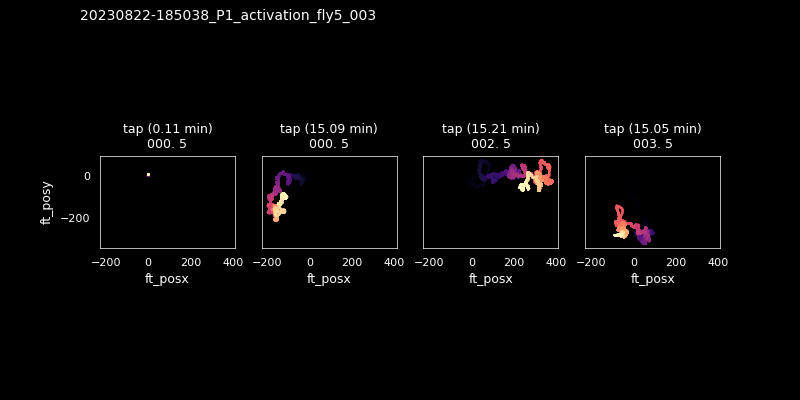

Text(0.1, 0.95, '20230822-185038_P1_activation_fly5_003')

In [344]:
n_files = len(filenames)
fig, axn = pl.subplots(1, n_files, sharex=True, sharey=True, figsize=(n_files*2, 4))
for ai, (fn, df_) in enumerate(merged.groupby('filename')):
    ax=axn[ai]
    #df1_ = merged[merged['filename']==fn].copy()
    dur_min = df_['rel_time'].max() / 60.
    sns.scatterplot(data=df_, x=xvar, y=yvar, ax=ax, palette='magma',
                   edgecolor='none', s=3 , legend=0, hue='rel_time') #color=colors[ci])
                    #hue_norm=mpl.colors.Normalize(vmin=0, vmax=1800))
    curr_cond = df_['condition'].unique()[0]
    ax.set_title('{} ({:.2f} min)\n{}. {}'.format(curr_cond, dur_min, \
                                                  fn.split('_')[-1], bk))
    ax.set_aspect('equal')
fig.text(0.1, 0.95, fn)


<IPython.core.display.Javascript object>


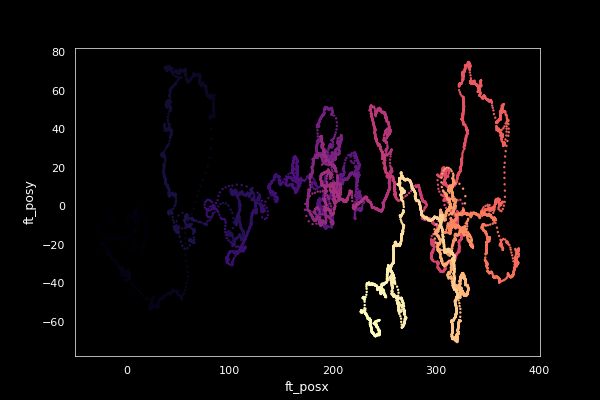

20230822-182855_P1_activation_fly5_002


<AxesSubplot: xlabel='ft_posx', ylabel='ft_posy'>

In [346]:
fig, ax = pl.subplots()
fn = filenames[-2]
print(fn)
df_ = merged[merged['filename']==fn]

#df1_ = merged[merged['filename']==fn].copy()
dur_min = df_['rel_time'].max() / 60.
sns.scatterplot(data=df_, x=xvar, y=yvar, ax=ax, palette='magma',
               edgecolor='none', s=3 , legend=0, hue='rel_time') #color=colors[ci])

In [87]:
df1_['blocknum'].unique()

array([0.])